In [1]:
import polars as pl
import pandas as pd
import prince
import numpy as np
print(pl.__version__)

1.31.0


In [3]:
import preprocessing_data as ppd


In [4]:
df=ppd.make_clean("data/dataset-tickets-multi-lang3-4k.csv")
df

Some elements have been dropped during cleaning


subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""Problema crítico del servidor …","""Es necesaria una investigación…","""Estamos investigando urgenteme…","""Incident""","""Technical Support""","""high""","""es""","""IT Services""","""Urgent Issue""","""Service Disruption""","""Incident Report""","""Service Recovery""","""System Maintenance""",null,null,null
"""Anfrage zur Verfügbarkeit des …","""Sehr geehrter Kundenservice, …","""Sehr geehrter <name>, vielen …","""Request""","""Customer Service""","""low""","""de""","""Tech Online Store""","""Sales Inquiry""","""Product Support""","""Customer Service""","""Order Issue""","""Returns and Exchanges""",null,null,null
"""Erro na Autocompletação de Cód…","""Prezado Suporte ao Cliente <na…","""Prezado <name>, Obrigado por …","""Incident""","""Technical Support""","""high""","""pt""","""IT Services""","""Technical Support""","""Software Bug""","""Problem Resolution""","""Urgent Issue""","""IT Support""",null,null,null
"""Urgent Assistance Required: AW…","""Dear IT Services Support Team,…","""Dear <name>, Thank you for re…","""Request""","""IT Support""","""high""","""en""","""IT Services""","""IT Support""","""Urgent Issue""","""Service Notification""","""Cloud Services""","""Problem Resolution""","""Technical Guidance""","""Performance Tuning""",null
"""Problème d'affichage de MacBoo…","""Cher équipe de support du maga…","""Cher <name>, Merci de nous av…","""Incident""","""Product Support""","""low""","""fr""","""Tech Online Store""","""Technical Support""","""Product Support""","""Hardware Failure""","""Service Recovery""","""Routine Request""",null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Problem mit der HP DeskJet 375…","""Sehr geehrter Tech Online Stor…","""Sehr geehrter <name>, bitte st…","""Problem""","""Customer Service""","""low""","""de""","""Tech Online Store""","""Technical Support""","""Product Support""","""Hardware Failure""","""Network Issue""","""Problem Resolution""",null,null,null
"""Problemas com a impressora HP …","""Olá Suporte ao Cliente, Estou…","""Assunto: Re: Problemas com a i…","""Incident""","""Product Support""","""medium""","""pt""","""Tech Online Store""","""Technical Support""","""Printer Issues""","""Hardware Failure""","""Network Issue""","""Problem Resolution""","""Customer Service""",null,null
"""Problema urgente con el envío""","""Estimado equipo de atención al…","""Estimado <name>, Nos disculpa…","""Incident""","""Service Outages and Maintenanc…","""high""","""es""","""Online Store""","""Shipping Delay""","""Customer Service""","""Order Issue""","""Urgent Issue""","""Problem Resolution""",null,null,null


In [7]:
df=pd.DataFrame(df, columns=df.columns)

In [11]:
df["queue"].value_counts()*100/sum(df["queue"].value_counts())

queue
Technical Support                  32.933233
Product Support                    17.229307
Customer Service                   15.678920
IT Support                         11.127782
Billing and Payments                8.452113
Returns and Exchanges               4.926232
Service Outages and Maintenance     3.525881
Sales and Pre-Sales                 3.425856
General Inquiry                     1.375344
Human Resources                     1.325331
Name: count, dtype: float64

# Let's go pour l'AFCM

 ## Les Tags

Après avoir analysé le tableau statistique des données produit via streamlit, il faut noter qu'il y a dans des variables "tags" qui contiennent pratiquement que des valeurs "null".  Certaines seront supprimées (tag8 et tag9) et d'autres retirées pour être utilisées comme variables supplémentaires (tag6 et 7).

In [4]:
df.columns

['subject',
 'body',
 'answer',
 'type',
 'queue',
 'priority',
 'language',
 'business_type',
 'tag_1',
 'tag_2',
 'tag_3',
 'tag_4',
 'tag_5',
 'tag_6',
 'tag_7',
 'tag_8',
 'tag_9']

In [150]:
#supprimer de la colonne tag8
df=df.drop('tag_8')
df.columns

['subject',
 'body',
 'answer',
 'type',
 'queue',
 'priority',
 'language',
 'business_type',
 'tag_1',
 'tag_2',
 'tag_3',
 'tag_4',
 'tag_5',
 'tag_6',
 'tag_7']

In [20]:
df.shape

(4000, 15)

In [29]:
df[:,8:13].columns

['tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5']

In [117]:
df_tags=pd.DataFrame(df[:,8:13])

In [118]:
tdc = pd.get_dummies(df_tags)

In [119]:
tdc=tdc.astype(int)
tdc

,0_Account Assistance,0_Account Security,0_Billing Issue,0_Consulting Services,0_Critical Failure,0_Customer Feedback,0_Customer Service,0_Data Breach,0_Database Issue,0_Delivery Issue,...,4_Urgent Issue,4_User Guidance,4_User Setup,4_Video Conferencing,4_Virus Removal,4_Warranty Claim,4_Wi-Fi Connection,4_Wi-Fi Issue,4_Wi-Fi Issues,4_Wireless Setup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
def treat_tdc(tdc):
    '''this function is to process TDC'''
    variables=[col[2:] for col in tdc.columns]
    tags=list(set(variables))
    tdc_new = pd.DataFrame(np.zeros( (tdc.shape[0], len(tags) )), columns=sorted(tags) )
    
    #dico={tag : [] for tag in tags }
    for col in tdc.columns:
        for t in tdc_new.columns:
            if col[2:] == t:
                #dico[f"{t}"].append(col)
                tdc_new[f"{t}"] = tdc_new[f"{t}"] + tdc[f"{col}"]
                break
    
    return tdc_new


In [121]:
tdc_new=treat_tdc(tdc)
tdc_new

,AWS Assistance,AWS Management,AWS Management Service,AWS Optimization,AWS Support,Account Assistance,Account Security,Accounting Assistance,Amazon Web Services,Audio Issue,...,Wi-Fi Configuration,Wi-Fi Connection,Wi-Fi Connectivity,Wi-Fi Connectivity Issue,Wi-Fi Issue,Wi-Fi Issues,Wi-Fi Setup,Wireless Configuration,Wireless Connectivity,Wireless Setup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
tdc_new.sum().sort_values(ascending=False)

Technical Support           3115.0
Problem Resolution          2281.0
Product Support             1788.0
Urgent Issue                1571.0
IT Support                   949.0
                             ...  
Video Conferencing Issue       1.0
Wi-Fi Issues                   1.0
Wi-Fi Connectivity             1.0
Wireless Configuration         1.0
Wi-Fi Setup                    1.0
Length: 161, dtype: float64

In [123]:
# Initialisation et entraînement ACM
mca = prince.MCA(n_components=5, random_state=15)
mca = mca.fit(tdc_new)

# Coordonnées des individus
coord_individus = mca.row_coordinates(tdc_new)

# Coordonnées des modalités
coord_modalites = mca.column_coordinates(tdc_new)


In [125]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.024,2.37%,2.37%
1,0.017,1.72%,4.09%
2,0.014,1.40%,5.49%
3,0.013,1.33%,6.82%
4,0.012,1.25%,8.07%


* Au vue de ces résultats, nous ne pouvons tirer grand chose compte tenu du la faible contribution de chaque axe (moins de 3%).
Passons à une analyse avec les autres variables (type, queue, priority, business_type).

## Les autres variables

In [126]:
df.columns

['subject',
 'body',
 'answer',
 'type',
 'queue',
 'priority',
 'language',
 'business_type',
 'tag_1',
 'tag_2',
 'tag_3',
 'tag_4',
 'tag_5',
 'tag_6',
 'tag_7']

In [161]:
df_other_var = pd.DataFrame(df[['type','queue','priority','business_type']], columns=['type','queue','priority','business_type'])
df_other_var

,type,queue,priority,business_type
0,Incident,Technical Support,high,IT Services
1,Request,Customer Service,low,Tech Online Store
2,Incident,Technical Support,high,IT Services
3,Request,IT Support,high,IT Services
4,Incident,Product Support,low,Tech Online Store
...,...,...,...,...
3995,Problem,Customer Service,low,Tech Online Store
3996,Incident,Product Support,medium,Tech Online Store
3997,Incident,Service Outages and Maintenance,high,Online Store
3998,Incident,Technical Support,high,IT Services


In [162]:
tdc = pd.get_dummies(df_other_var)


,type_Change,type_Incident,type_Problem,type_Request,queue_Billing and Payments,queue_Customer Service,queue_General Inquiry,queue_Human Resources,queue_IT Support,queue_Product Support,...,priority_medium,business_type_Adobe Photoshop 2024,business_type_IT Consulting Firm,business_type_IT Consulting Service,business_type_IT Services,business_type_Online Store,business_type_Pit Services,business_type_Software Development Company,business_type_Tech Online Store,business_type__IT_Services_
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3996,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
3997,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3998,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [174]:
tdc_new = tdc.astype(int)
tdc_new

,type_Change,type_Incident,type_Problem,type_Request,queue_Billing and Payments,queue_Customer Service,queue_General Inquiry,queue_Human Resources,queue_IT Support,queue_Product Support,...,priority_medium,business_type_Adobe Photoshop 2024,business_type_IT Consulting Firm,business_type_IT Consulting Service,business_type_IT Services,business_type_Online Store,business_type_Pit Services,business_type_Software Development Company,business_type_Tech Online Store,business_type__IT_Services_
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3996,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
3997,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3998,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [175]:
tdc_new.columns

Index(['type_Change', 'type_Incident', 'type_Problem', 'type_Request',
       'queue_Billing and Payments', 'queue_Customer Service',
       'queue_General Inquiry', 'queue_Human Resources', 'queue_IT Support',
       'queue_Product Support', 'queue_Returns and Exchanges',
       'queue_Sales and Pre-Sales', 'queue_Service Outages and Maintenance',
       'queue_Technical Support', 'priority_high', 'priority_low',
       'priority_medium', 'business_type_Adobe Photoshop 2024',
       'business_type_IT Consulting Firm',
       'business_type_IT Consulting Service', 'business_type_IT Services',
       'business_type_Online Store', 'business_type_Pit Services',
       'business_type_Software Development Company',
       'business_type_Tech Online Store', 'business_type__IT_Services_'],
      dtype='object')

In [176]:
# Initialisation et entraînement ACM
mca = prince.MCA(n_components=5, random_state=42)
mca = mca.fit(tdc_new)

# Coordonnées des individus
coord_individus = mca.row_coordinates(tdc_new)

# Coordonnées des modalités
coord_modalites = mca.column_coordinates(tdc_new)


In [177]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.105,10.47%,10.47%
1,0.068,6.77%,17.24%
2,0.061,6.07%,23.30%
3,0.056,5.57%,28.87%
4,0.055,5.52%,34.39%


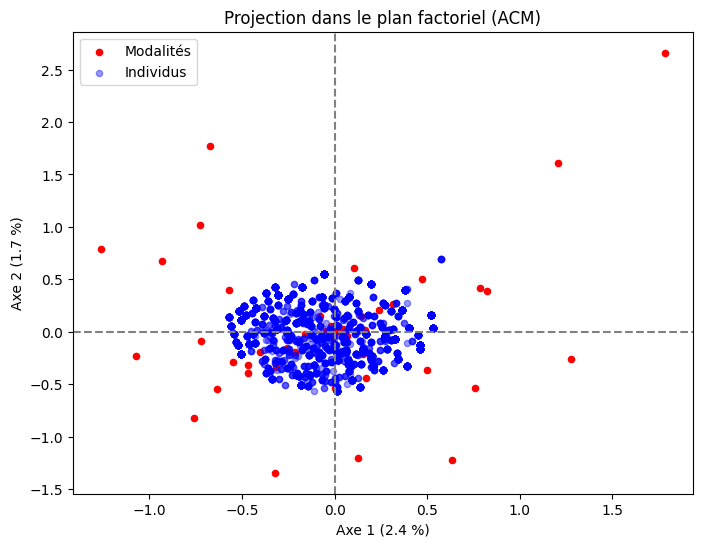

In [178]:
coord_ind = mca.row_coordinates(tdc_new)
coord_var = mca.column_coordinates(tdc_new)

# Affichage
fig, ax = plt.subplots(figsize=(8, 6))
coord_var.plot(kind='scatter', x=0, y=1, ax=ax, color='red', label='Modalités')
coord_ind.plot(kind='scatter', x=0, y=1, ax=ax, color='blue', alpha=0.4, label='Individus')

ax.axhline(0, color='grey', linestyle='--')
ax.axvline(0, color='grey', linestyle='--')
ax.set_xlabel(f'Axe 1 ({var_exp[0]:.1f} %)')
ax.set_ylabel(f'Axe 2 ({var_exp[1]:.1f} %)')
ax.set_title('Projection dans le plan factoriel (ACM)')
ax.legend()
plt.show()

In [179]:
pd.crosstab(df_other_var['queue'], df['business_type'])

col_0,Adobe Photoshop 2024,IT Consulting Firm,IT Consulting Service,IT Services,Online Store,Pit Services,Software Development Company,Tech Online Store,_IT_Services_
queue,,,,,,,,,
Billing and Payments,0,26,0,116,12,0,37,147,0
Customer Service,0,92,3,216,27,0,19,270,0
General Inquiry,0,15,0,28,4,0,2,6,0
Human Resources,0,10,0,36,1,0,6,0,0
IT Support,0,52,0,360,13,0,10,10,0
Product Support,2,23,0,79,30,0,84,472,0
Returns and Exchanges,0,0,0,5,14,0,0,178,0
Sales and Pre-Sales,0,20,0,11,9,0,26,71,0
Service Outages and Maintenance,0,3,0,122,11,0,1,4,0


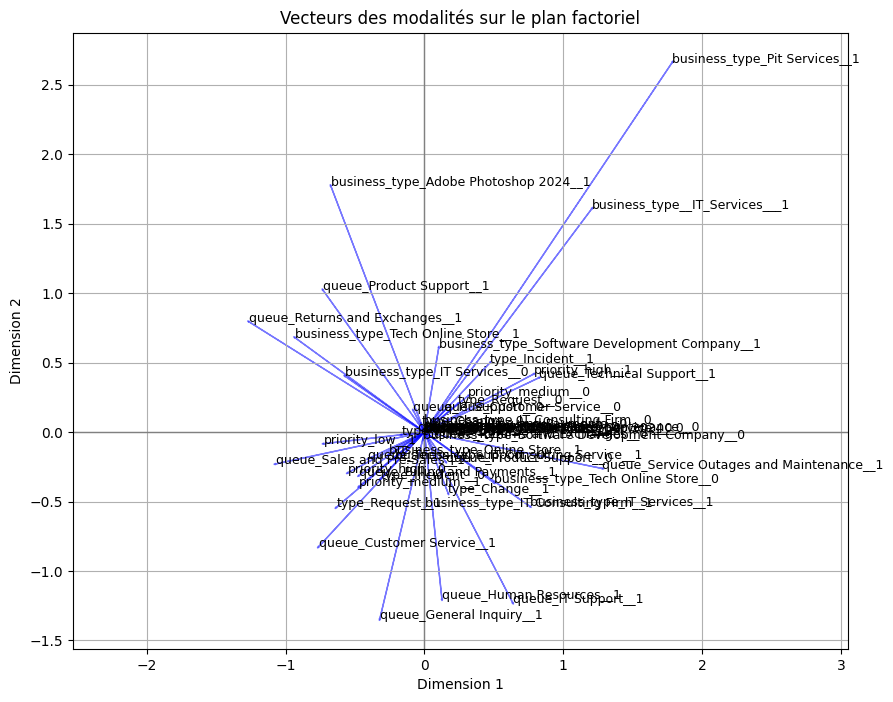

In [180]:

coord_modalites = mca.column_coordinates(tdc_new)

# Tracé
plt.figure(figsize=(10, 8))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

# Tracer les vecteurs
for i in range(coord_modalites.shape[0]):
    x = coord_modalites.iloc[i, 0]
    y = coord_modalites.iloc[i, 1]
    plt.arrow(0, 0, x, y, color='blue', alpha=0.5, head_width=0.01)
    plt.text(x, y, coord_modalites.index[i], fontsize=9)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Vecteurs des modalités sur le plan factoriel')
plt.grid(True)
plt.axis('equal')  # Pour garder les bonnes proportions
plt.show()


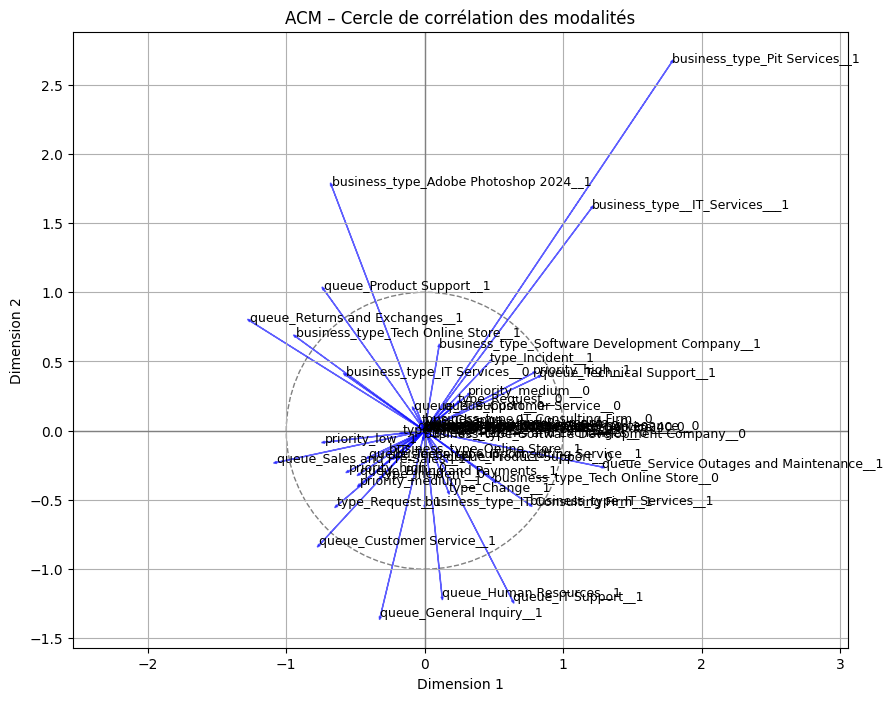

In [181]:
# Tracer les vecteurs des modalités avec cercle de corrélation
plt.figure(figsize=(10, 8))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

# Cercle de corrélation
circle = plt.Circle((0, 0), 1, color='grey', fill=False, linestyle='--')
plt.gca().add_patch(circle)

# Tracer les vecteurs
for i in range(coord_modalites.shape[0]):
    x = coord_modalites.iloc[i, 0]
    y = coord_modalites.iloc[i, 1]
    plt.arrow(0, 0, x, y, color='blue', alpha=0.6, head_width=0.015)
    plt.text(x, y, coord_modalites.index[i], fontsize=9)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('ACM – Cercle de corrélation des modalités')
plt.grid(True)
plt.axis('equal')  # pour que le cercle soit bien rond
plt.show()

In [182]:
mca.column_contributions_

,0,1,2,3,4
type_Change__0,1.455589e-04,1.501923e-03,4.607436e-03,3.373348e-02,0.004552
type_Change__1,1.171716e-03,1.209014e-02,3.708882e-02,2.715469e-01,0.036640
type_Incident__0,2.208598e-02,3.827555e-02,1.497020e-02,1.352966e-02,0.104158
type_Incident__1,3.285427e-02,5.693726e-02,2.226910e-02,2.012621e-02,0.154942
type_Problem__0,5.588068e-04,1.022443e-05,8.640806e-06,1.855955e-02,0.074755
type_Problem__1,2.061624e-03,3.772132e-05,3.187880e-05,6.847232e-02,0.275796
type_Request__0,1.528815e-02,1.725438e-02,3.582332e-02,1.944260e-03,0.004410
type_Request__1,4.045716e-02,4.566040e-02,9.479954e-02,5.145112e-03,0.011669
queue_Billing and Payments__0,6.330369e-04,4.310235e-04,5.394228e-05,2.240344e-04,0.000692
queue_Billing and Payments__1,6.858524e-03,4.669846e-03,5.844279e-04,2.427260e-03,0.007501


In [189]:
contrib = mca.column_contributions_
contrib.index = contrib.index.str.replace(r'_\d+$', '', regex=True)
# Regrouper les lignes par modalité
contrib_grouped = contrib.groupby(contrib.index).sum()
contrib_grouped*100

,0,1,2,3,4
business_type_Adobe Photoshop 2024_,0.008328,0.088937,0.851159,0.018032,0.232298
business_type_IT Consulting Firm_,0.000012,1.781523,0.072262,3.598402,9.360728
business_type_IT Consulting Service_,0.002981,0.003728,0.045771,0.391980,0.109491
business_type_IT Services_,15.862070,12.169333,0.041409,4.326814,0.654164
business_type_Online Store_,0.106775,0.063266,0.217880,0.449565,0.496073
business_type_Pit Services_,0.146284,0.503288,0.051461,0.036921,0.449915
business_type_Software Development Company_,0.032566,1.754241,3.034311,18.717699,0.148840
business_type_Tech Online Store_,17.039954,14.011590,0.629361,2.718109,0.378097
business_type__IT_Services__,0.026667,0.073409,0.070068,0.079760,0.632368
priority_high_,15.866621,6.926063,7.459063,1.533745,3.661894


### 3 variables

In [190]:
df_other_var = pd.DataFrame(df[['type','queue','business_type']], columns=['type','queue','business_type'])
df_other_var

,type,queue,business_type
0,Incident,Technical Support,IT Services
1,Request,Customer Service,Tech Online Store
2,Incident,Technical Support,IT Services
3,Request,IT Support,IT Services
4,Incident,Product Support,Tech Online Store
...,...,...,...
3995,Problem,Customer Service,Tech Online Store
3996,Incident,Product Support,Tech Online Store
3997,Incident,Service Outages and Maintenance,Online Store
3998,Incident,Technical Support,IT Services


In [191]:
tdc = pd.get_dummies(df_other_var)


In [192]:
tdc_new = tdc.astype(int)
tdc_new

,type_Change,type_Incident,type_Problem,type_Request,queue_Billing and Payments,queue_Customer Service,queue_General Inquiry,queue_Human Resources,queue_IT Support,queue_Product Support,...,queue_Technical Support,business_type_Adobe Photoshop 2024,business_type_IT Consulting Firm,business_type_IT Consulting Service,business_type_IT Services,business_type_Online Store,business_type_Pit Services,business_type_Software Development Company,business_type_Tech Online Store,business_type__IT_Services_
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3996,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3997,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3998,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [193]:
tdc_new.columns

Index(['type_Change', 'type_Incident', 'type_Problem', 'type_Request',
       'queue_Billing and Payments', 'queue_Customer Service',
       'queue_General Inquiry', 'queue_Human Resources', 'queue_IT Support',
       'queue_Product Support', 'queue_Returns and Exchanges',
       'queue_Sales and Pre-Sales', 'queue_Service Outages and Maintenance',
       'queue_Technical Support', 'business_type_Adobe Photoshop 2024',
       'business_type_IT Consulting Firm',
       'business_type_IT Consulting Service', 'business_type_IT Services',
       'business_type_Online Store', 'business_type_Pit Services',
       'business_type_Software Development Company',
       'business_type_Tech Online Store', 'business_type__IT_Services_'],
      dtype='object')

In [194]:
# Initialisation et entraînement ACM
mca = prince.MCA(n_components=5, random_state=42)
mca = mca.fit(tdc_new)

# Coordonnées des individus
coord_individus = mca.row_coordinates(tdc_new)

# Coordonnées des modalités
coord_modalites = mca.column_coordinates(tdc_new)


In [195]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.103,10.27%,10.27%
1,0.074,7.36%,17.63%
2,0.064,6.38%,24.01%
3,0.062,6.21%,30.22%
4,0.058,5.85%,36.07%


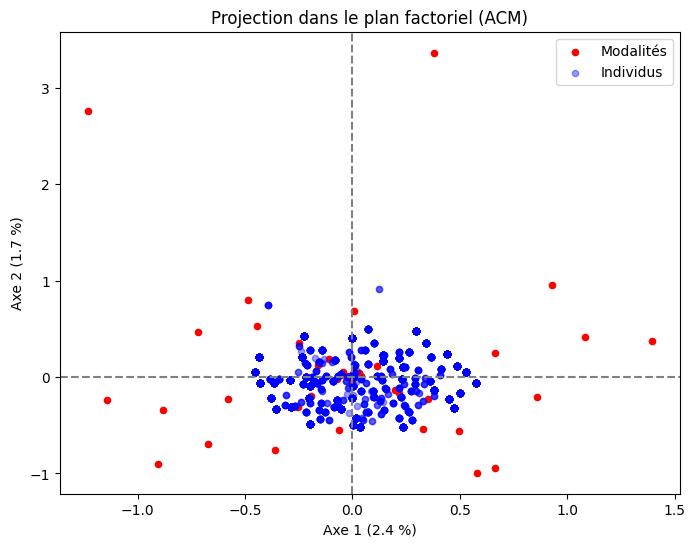

In [196]:
coord_ind = mca.row_coordinates(tdc_new)
coord_var = mca.column_coordinates(tdc_new)

# Affichage
fig, ax = plt.subplots(figsize=(8, 6))
coord_var.plot(kind='scatter', x=0, y=1, ax=ax, color='red', label='Modalités')
coord_ind.plot(kind='scatter', x=0, y=1, ax=ax, color='blue', alpha=0.4, label='Individus')

ax.axhline(0, color='grey', linestyle='--')
ax.axvline(0, color='grey', linestyle='--')
ax.set_xlabel(f'Axe 1 ({var_exp[0]:.1f} %)')
ax.set_ylabel(f'Axe 2 ({var_exp[1]:.1f} %)')
ax.set_title('Projection dans le plan factoriel (ACM)')
ax.legend()
plt.show()

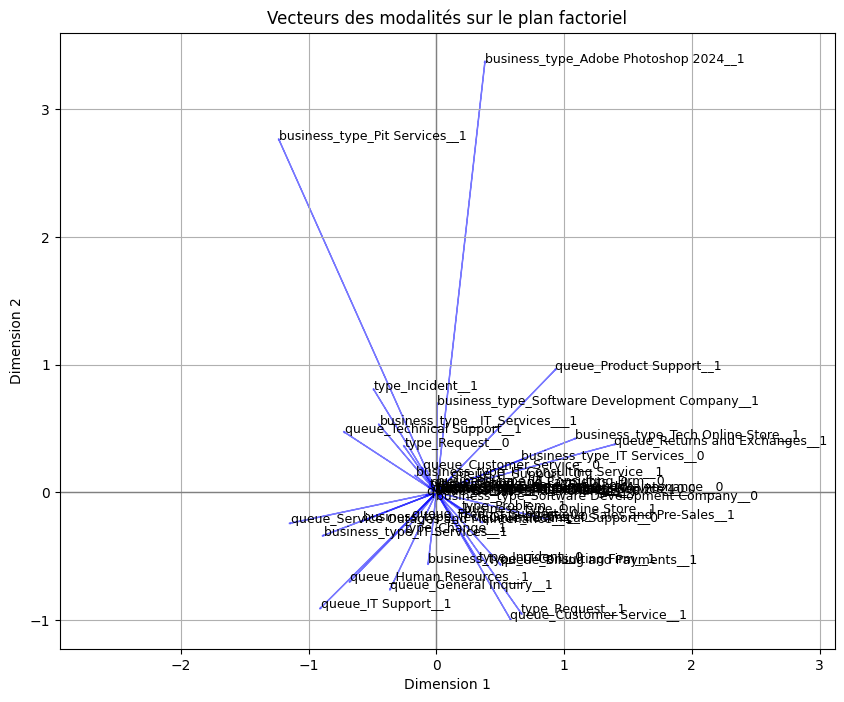

In [198]:

coord_modalites = mca.column_coordinates(tdc_new)

# Tracé
plt.figure(figsize=(10, 8))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

# Tracer les vecteurs
for i in range(coord_modalites.shape[0]):
    x = coord_modalites.iloc[i, 0]
    y = coord_modalites.iloc[i, 1]
    plt.arrow(0, 0, x, y, color='blue', alpha=0.5, head_width=0.01)
    plt.text(x, y, coord_modalites.index[i], fontsize=9)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Vecteurs des modalités sur le plan factoriel')
plt.grid(True)
plt.axis('equal')  # Pour garder les bonnes proportions
plt.show()


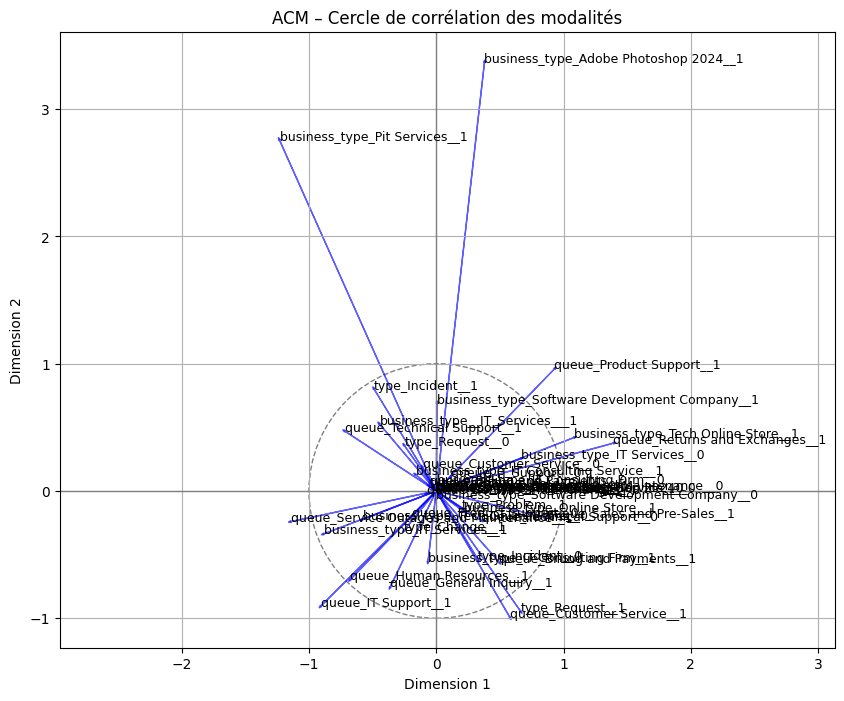

In [199]:
# Tracer les vecteurs des modalités avec cercle de corrélation
plt.figure(figsize=(10, 8))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

# Cercle de corrélation
circle = plt.Circle((0, 0), 1, color='grey', fill=False, linestyle='--')
plt.gca().add_patch(circle)

# Tracer les vecteurs
for i in range(coord_modalites.shape[0]):
    x = coord_modalites.iloc[i, 0]
    y = coord_modalites.iloc[i, 1]
    plt.arrow(0, 0, x, y, color='blue', alpha=0.6, head_width=0.015)
    plt.text(x, y, coord_modalites.index[i], fontsize=9)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('ACM – Cercle de corrélation des modalités')
plt.grid(True)
plt.axis('equal')  # pour que le cercle soit bien rond
plt.show()

In [200]:
mca.column_contributions_

,0,1,2,3,4
type_Change__0,3.682459e-04,7.702714e-04,4.302653e-02,2.657201e-04,2.080924e-05
type_Change__1,2.964296e-03,6.200510e-03,3.463538e-01,2.138987e-03,1.675097e-04
type_Incident__0,2.725170e-02,1.022851e-01,1.219881e-02,2.606114e-02,3.540487e-02
type_Incident__1,4.053860e-02,1.521554e-01,1.814648e-02,3.876756e-02,5.266695e-02
type_Problem__0,9.675271e-04,6.187985e-04,3.246602e-03,7.952824e-02,4.382010e-02
type_Problem__1,3.569528e-03,2.282953e-03,1.197779e-02,2.934061e-01,1.616669e-01
type_Request__0,1.923982e-02,5.460877e-02,4.908064e-03,2.726699e-02,2.725075e-03
type_Request__1,5.091448e-02,1.445116e-01,1.298825e-02,7.215687e-02,7.211388e-03
queue_Billing and Payments__0,8.111131e-04,1.445819e-03,9.894880e-05,7.263304e-06,6.600094e-08
queue_Billing and Payments__1,8.787858e-03,1.566446e-02,1.072043e-03,7.869295e-05,7.150752e-07


In [201]:
contrib = mca.column_contributions_
contrib.index = contrib.index.str.replace(r'_\d+$', '', regex=True)
# Regrouper les lignes par modalité
contrib_grouped = contrib.groupby(contrib.index).sum()
contrib_grouped*100

,0,1,2,3,4
business_type_Adobe Photoshop 2024_,0.003038,0.334854,0.045024,0.012388,0.565319
business_type_IT Consulting Firm_,0.019163,1.953571,0.411732,18.023523,5.310760
business_type_IT Consulting Service_,0.001921,0.001664,0.384800,0.000383,1.277372
business_type_IT Services_,24.782245,5.034514,1.640717,4.525172,4.931744
business_type_Online Store_,0.088413,0.068323,0.763397,0.168843,1.737135
business_type_Pit Services_,0.080327,0.562139,0.274294,0.507609,0.191410
business_type_Software Development Company_,0.000165,2.360607,17.882619,1.699269,10.433085
business_type_Tech Online Store_,26.502932,5.561570,2.950185,1.054297,2.756798
business_type__IT_Services__,0.004202,0.008167,0.111388,0.339305,1.634956
queue_Billing and Payments_,0.959897,1.711028,0.117099,0.008596,0.000078


Les résultats ne donnent pas quelque chose de satisfaisant à exploiter.

# Let's go pour le traitement des questions et responses

In [5]:
df=make_clean("data/aa_dataset-tickets-multi-lang-5-2-50-version.csv")
df_body = df.filter(pl.col("language") == "en")
df_body=df_body["body"]
df_body

No difference between after cleaning


body
str
"""Dear Customer Support Team,\n\…"
"""Dear Customer Support Team,\n\…"
"""Dear Customer Support Team,\n\…"
"""Dear Support Team,\n\nI hope t…"
"""Dear Customer Support,\n\nI ho…"
…
"""An unexpected billing discrepa…"
"""A data breach has occurred, wh…"
"""The data analytics tool experi…"


In [6]:
request= list(df_body)
request

['Dear Customer Support Team,\\n\\nI am writing to report a significant problem with the centralized account management portal, which currently appears to be offline. This outage is blocking access to account settings, leading to substantial inconvenience. I have attempted to log in multiple times using different browsers and devices, but the issue persists.\\n\\nCould you please provide an update on the outage status and an estimated time for resolution? Also, are there any alternative ways to access and manage my account during this downtime?',
 'Dear Customer Support Team,\\n\\nI hope this message reaches you well. I am reaching out to request detailed information about the capabilities of your smart home integration products listed on your website. As a potential customer aiming to develop a seamlessly interconnected home environment, it is essential to understand how your products interact with various smart home platforms.\\n\\nCould you kindly provide detailed compatibility info

In [7]:
request[2]

'Dear Customer Support Team,\\n\\nI hope this message finds you well. I am reaching out to request clarification about the billing and payment procedures linked to my account. Recently, I observed some inconsistencies in the charges applied and would like to ensure I fully understand the billing cycle, accepted payment options, and any potential extra charges.\\n\\nFirstly, I would be grateful if you could provide a detailed explanation of how the billing cycle functions. Specifically, I am interested in knowing the start and end dates.\\n\\nThank you for your assistance regarding these billing inquiries.'

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
Vect=CountVectorizer(stop_words="english") # si besoin d'intégrer tous les stop_words, remplacer "english" par None 
Vect.fit(request)
Vect.get_feature_names_out()

array(['00', '000', '04', ..., 'zurückzuführen', 'zusammenbruch',
       'überprüft'], dtype=object)

In [10]:
print(Vect.get_feature_names_out()[:52])

['00' '000' '04' '06' '10' '100' '11' '12' '1234567890' '13' '14' '15'
 '16' '16gb' '17' '18' '19' '19c' '1tb' '20' '2000' '2019' '2021' '2022'
 '2023' '20mb' '20th' '22' '23456' '24' '2530' '27' '27001' '28' '32'
 '32gb' '35' '360' '365' '3d' '453d' '48' '48g' '4k' '500w' '5950x' '6800'
 '6tb' '71' '82' '895l' 'aber']


Nous faisons l'hypothèse que Les premières valeurs du vocabulaire n'apporteraient rien à l'apprentissage. Nous allons donc les supprimer

In [11]:
from sklearn.feature_extraction import text

In [12]:
# 1. Récupérer les stop words anglais par défaut
default_stopwords = text.ENGLISH_STOP_WORDS

# 2. Ajouter tes propres stop words
custom_stopwords = list(default_stopwords.union(set(Vect.get_feature_names_out()[:51])))

# 3. Créer le vectorizer avec la liste combinée
vect = CountVectorizer(stop_words=custom_stopwords)

# 4. Utiliser normalement
vect.fit(request)
vect.get_feature_names_out()

array(['aber', 'abilities', 'ability', ..., 'zurückzuführen',
       'zusammenbruch', 'überprüft'], dtype=object)

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer

In [14]:
train_dtm = vect.transform(request)
train_dtm.toarray()

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(train_dtm)
train_tfidf=tfidf_transformer.transform(train_dtm)


In [15]:
from sklearn.metrics.pairwise import cosine_similarity

*Penser à utiliser des corpus contenant des mots et leurs synonymes. Ils peuvent servir au cas où certains mots ne se retrouvent pas dans le vocabulaire retenu afin de les remplacer*

Prochaines tâches:


*1- Proposer des requêtes similaires et analyser les réponses*

*2- On peut classer les requêtes par département d'assignation: Rassembleer les requêtes similaires et ressortir les départements les plus sollicités repondant à chaque groupe de requêtes similaires. Ainsi, un utilisateur pourrait être orienté si ce dernier ne sait à qui s'adresser"*

## Proposer des requêtes similaires

In [16]:
similarity = cosine_similarity(train_tfidf, train_tfidf[472])

sorted_indices = [i for i, v in sorted(enumerate(similarity), key=lambda x: x[1], reverse=True)]

valeurs_tries = sorted(similarity, reverse=True)

print(sorted_indices[1:11])

[0, 453, 419, 537, 496, 252, 160, 476, 411, 384]


In [17]:
print(valeurs_tries[1:11])

[array([0.77333149]), array([0.51569693]), array([0.38719266]), array([0.38527636]), array([0.36712663]), array([0.32476156]), array([0.31105098]), array([0.30884606]), array([0.30844032]), array([0.28384273])]


In [18]:
request[453]

'Dear Customer Support Team,\\n\\nI am submitting a report regarding a problem with the Account Control Center, which seems to be temporarily unavailable. I cannot access key account features, and this outage is affecting my ability to manage services efficiently. Could you please provide an update on the status of the outage and an estimated time for resolution?\\n\\nIn addition, please share any recommended alternative methods to access account management functions during this downtime, as I depend heavily on this service for daily operations.'

In [19]:
request[0]

'Dear Customer Support Team,\\n\\nI am writing to report a significant problem with the centralized account management portal, which currently appears to be offline. This outage is blocking access to account settings, leading to substantial inconvenience. I have attempted to log in multiple times using different browsers and devices, but the issue persists.\\n\\nCould you please provide an update on the outage status and an estimated time for resolution? Also, are there any alternative ways to access and manage my account during this downtime?'

## Classification des requêtes par département d'assignation

In [20]:
from sklearn.naive_bayes import MultinomialNB

In [21]:
Y_train=list(df.filter(pl.col("language")=="en")["queue"])

In [22]:
print(Y_train)

['Technical Support', 'Returns and Exchanges', 'Billing and Payments', 'Sales and Pre-Sales', 'Technical Support', 'Service Outages and Maintenance', 'Technical Support', 'Product Support', 'IT Support', 'Product Support', 'Product Support', 'Customer Service', 'Technical Support', 'Customer Service', 'Service Outages and Maintenance', 'Technical Support', 'Technical Support', 'Human Resources', 'Billing and Payments', 'IT Support', 'Technical Support', 'Technical Support', 'Technical Support', 'Customer Service', 'Billing and Payments', 'Technical Support', 'Customer Service', 'Billing and Payments', 'Technical Support', 'Technical Support', 'General Inquiry', 'Product Support', 'Technical Support', 'Customer Service', 'Technical Support', 'Customer Service', 'Returns and Exchanges', 'IT Support', 'Technical Support', 'Customer Service', 'Customer Service', 'Customer Service', 'Billing and Payments', 'Customer Service', 'Technical Support', 'IT Support', 'Technical Support', 'Product 

In [23]:
len(Y_train)

16338

In [24]:
train_tfidf.shape

(16338, 4768)

In [25]:
# Entraînement
model = MultinomialNB()
model.fit(train_tfidf, Y_train)  # C'est ça que le modèle apprend

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [26]:
model.predict(train_tfidf[0])

array(['Technical Support'], dtype='<U31')

In [27]:
from sklearn.metrics import accuracy_score

# Étape 1 : prédictions
y_pred = model.predict(train_tfidf)

# Étape 2 : évaluer l'accuracy
acc = accuracy_score(Y_train, y_pred)

print(f"Accuracy: {acc:.2f}")


Accuracy: 0.43


In [28]:
from sklearn.metrics import classification_report, f1_score

# F1-score global (moyenne pondérée si multi-classes)
f1 = f1_score(Y_train, y_pred, average='weighted')  # ou 'macro', 'micro'

print(f"F1-score : {f1:.2f}")

# Rapport complet (précision, rappel, F1)
print(classification_report(Y_train, y_pred))


F1-score : 0.38
                                 precision    recall  f1-score   support

           Billing and Payments       0.92      0.59      0.72      1595
               Customer Service       0.31      0.44      0.37      2410
                General Inquiry       0.00      0.00      0.00       236
                Human Resources       0.91      0.03      0.06       348
                     IT Support       0.87      0.06      0.12      1942
                Product Support       0.44      0.31      0.36      3073
          Returns and Exchanges       1.00      0.05      0.09       820
            Sales and Pre-Sales       1.00      0.02      0.04       513
Service Outages and Maintenance       0.97      0.06      0.11       664
              Technical Support       0.41      0.82      0.54      4737

                       accuracy                           0.43     16338
                      macro avg       0.68      0.24      0.24     16338
                   weighted avg  

D:\AI experiments\Customer_IT_Support-Ticket_Dataset\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\AI experiments\Customer_IT_Support-Ticket_Dataset\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\AI experiments\Customer_IT_Support-Ticket_Dataset\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

In [29]:
model.predict_proba(train_tfidf)[1]

array([0.0831199 , 0.1685524 , 0.01808536, 0.01653253, 0.10283519,
       0.22398851, 0.09373752, 0.08298052, 0.02283174, 0.18733633])

In [30]:
Y_train[1]

'Returns and Exchanges'

In [31]:
model.predict(train_tfidf[1])

array(['Product Support'], dtype='<U31')

### Essayons de voir le gain de performance avec le modèle Xgboost 

In [32]:
from xgboost import XGBClassifier

In [33]:
Y_train

['Technical Support',
 'Returns and Exchanges',
 'Billing and Payments',
 'Sales and Pre-Sales',
 'Technical Support',
 'Service Outages and Maintenance',
 'Technical Support',
 'Product Support',
 'IT Support',
 'Product Support',
 'Product Support',
 'Customer Service',
 'Technical Support',
 'Customer Service',
 'Service Outages and Maintenance',
 'Technical Support',
 'Technical Support',
 'Human Resources',
 'Billing and Payments',
 'IT Support',
 'Technical Support',
 'Technical Support',
 'Technical Support',
 'Customer Service',
 'Billing and Payments',
 'Technical Support',
 'Customer Service',
 'Billing and Payments',
 'Technical Support',
 'Technical Support',
 'General Inquiry',
 'Product Support',
 'Technical Support',
 'Customer Service',
 'Technical Support',
 'Customer Service',
 'Returns and Exchanges',
 'IT Support',
 'Technical Support',
 'Customer Service',
 'Customer Service',
 'Customer Service',
 'Billing and Payments',
 'Customer Service',
 'Technical Support',


In [34]:
modalite = sorted(set(Y_train))
codification_modalite = dict(zip(modalite,[i for i in range(len(modalite))]))

In [35]:
codification_modalite

{'Billing and Payments': 0,
 'Customer Service': 1,
 'General Inquiry': 2,
 'Human Resources': 3,
 'IT Support': 4,
 'Product Support': 5,
 'Returns and Exchanges': 6,
 'Sales and Pre-Sales': 7,
 'Service Outages and Maintenance': 8,
 'Technical Support': 9}

In [36]:
Y_train_codif = [codification_modalite[f"{key}"] for key in Y_train]

In [37]:
print(Y_train_codif)

[9, 6, 0, 7, 9, 8, 9, 5, 4, 5, 5, 1, 9, 1, 8, 9, 9, 3, 0, 4, 9, 9, 9, 1, 0, 9, 1, 0, 9, 9, 2, 5, 9, 1, 9, 1, 6, 4, 9, 1, 1, 1, 0, 1, 9, 4, 9, 5, 1, 5, 1, 4, 4, 9, 5, 9, 6, 9, 9, 4, 0, 9, 4, 8, 3, 0, 9, 9, 9, 4, 8, 9, 4, 4, 9, 9, 2, 1, 0, 4, 9, 0, 9, 0, 8, 9, 8, 5, 6, 7, 5, 4, 8, 1, 1, 5, 9, 1, 1, 4, 9, 4, 9, 5, 1, 9, 5, 9, 3, 0, 1, 9, 0, 5, 0, 9, 1, 9, 9, 4, 3, 2, 1, 1, 9, 2, 4, 5, 9, 9, 1, 9, 4, 9, 4, 5, 8, 5, 9, 4, 4, 7, 1, 8, 5, 5, 5, 4, 9, 9, 9, 4, 5, 9, 5, 9, 0, 5, 5, 5, 9, 6, 5, 5, 1, 9, 9, 9, 7, 0, 6, 5, 1, 1, 5, 1, 9, 4, 5, 5, 9, 9, 5, 9, 9, 5, 5, 5, 9, 5, 5, 1, 7, 5, 9, 9, 9, 7, 0, 5, 0, 1, 9, 7, 7, 9, 4, 0, 5, 5, 9, 4, 9, 5, 9, 4, 4, 9, 8, 1, 9, 9, 9, 9, 5, 2, 9, 9, 4, 6, 1, 1, 9, 5, 4, 0, 9, 8, 9, 5, 9, 9, 0, 2, 1, 9, 8, 4, 1, 7, 2, 8, 9, 5, 5, 5, 9, 5, 5, 9, 4, 1, 9, 8, 4, 1, 1, 5, 1, 4, 5, 8, 5, 0, 5, 5, 8, 1, 7, 8, 5, 1, 2, 1, 0, 1, 9, 0, 5, 6, 5, 8, 9, 4, 5, 1, 4, 5, 9, 6, 1, 5, 3, 1, 9, 2, 1, 1, 5, 1, 1, 5, 9, 9, 9, 4, 9, 1, 0, 5, 5, 5, 1, 9, 8, 9, 7, 6, 9, 5, 0, 5, 0, 

In [43]:
import os
print(os.getcwd())

D:\AI experiments\Customer_IT_Support-Ticket_Dataset


In [48]:
from gensim.models.fasttext import load_facebook_model

# Chemin vers ton fichier .bin téléchargé
model_path = "cc.en.300.bin/cc.en.300.bin"

# Charger le modèle FastText pré-entraîné
model = load_facebook_model(model_path)


KeyboardInterrupt: 

In [187]:
import xgboost as xgb


In [191]:
train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 472302 stored elements and shape (16338, 4768)>

In [194]:
len(Y_train_codif)

16338

In [175]:
df_test = make_clean("data/dataset-tickets-multi-lang3-4k.csv")
df_test=df_test.filter(pl.col("language")=="en")
df_test

Some elements have been dropped during cleaning


subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""Urgent Assistance Required: AW…","""Dear IT Services Support Team,…","""Dear <name>, Thank you for re…","""Request""","""IT Support""","""high""","""en""","""IT Services""","""IT Support""","""Urgent Issue""","""Service Notification""","""Cloud Services""","""Problem Resolution""","""Technical Guidance""","""Performance Tuning""",null
"""Urgent: Issue with Zoom Screen…","""Dear Customer Support, I am e…","""Dear <name>, Thank you for re…","""Incident""","""Technical Support""","""high""","""en""","""IT Services""","""Technical Support""","""Urgent Issue""","""Service Disruption""","""Problem Resolution""","""Software Bug""",null,null,null
"""Service outage resolution requ…","""Dear IT Services Customer Supp…","""Dear <name>, Thank you for re…","""Change""","""Service Outages and Maintenanc…","""high""","""en""","""IT Services""","""Service Outage""","""IT Support""","""Problem Resolution""","""Technical Support""","""Service Recovery""","""System Maintenance""","""Performance Tuning""","""Urgent Issue"""
"""Surface Pro 7 Issue""","""Dear Tech Online Store Support…","""Dear <name>, Thank you for re…","""Incident""","""Product Support""","""medium""","""en""","""Tech Online Store""","""Technical Support""","""Product Support""","""Software Bug""","""Hardware Failure""","""Problem Resolution""","""Service Recovery""",null,null
"""Request for software developme…","""Dear Customer Support, I hope…","""Dear <name>, Thank you for re…","""Request""","""Technical Support""","""medium""","""en""","""IT Services""","""IT Support""","""Technical Guidance""","""Problem Resolution""","""Service Notification""","""Urgent Issue""",null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Urgent Assistance Required for…","""Hello Customer Support Team, …","""Subject: Re: Urgent Assistance…","""Request""","""IT Support""","""high""","""en""","""IT Services""","""Technical Support""","""Urgent Issue""","""Service Recovery""","""Technical Guidance""","""Product Support""",null,null,null
"""Urgent Server Downtime Issue""","""Dear Customer Support Team, W…","""Dear <name>, Thank you for re…","""Problem""","""IT Support""","""high""","""en""","""IT Consulting Firm""","""Service Disruption""","""IT Support""","""Urgent Issue""","""System Maintenance""","""Incident Report""","""Technical Support""","""Service Recovery""",null
"""Immediate Assistance Needed: T…","""Dear Customer Support Team, O…","""Subject: Re: Immediate Assista…","""Incident""","""Technical Support""","""high""","""en""","""IT Services""","""Technical Support""","""Network Issue""","""Urgent Issue""","""Service Disruption""","""Hardware Failure""","""Problem Resolution""","""Technical Guidance""",null


In [242]:
Y_test=list(df_test.filter(pl.col("language")=="en")["queue"])

In [243]:
# Verification qu'on a les mêmes libellés
print(sorted(set(Y_train)))
print(sorted(set(Y_test)))

['Billing and Payments', 'Customer Service', 'General Inquiry', 'Human Resources', 'IT Support', 'Product Support', 'Returns and Exchanges', 'Sales and Pre-Sales', 'Service Outages and Maintenance', 'Technical Support']
['Billing and Payments', 'Customer Service', 'General Inquiry', 'Human Resources', 'IT Support', 'Product Support', 'Returns and Exchanges', 'Sales and Pre-Sales', 'Service Outages and Maintenance', 'Technical Support']


In [244]:
codification_modalite

{'Billing and Payments': 0,
 'Customer Service': 1,
 'General Inquiry': 2,
 'Human Resources': 3,
 'IT Support': 4,
 'Product Support': 5,
 'Returns and Exchanges': 6,
 'Sales and Pre-Sales': 7,
 'Service Outages and Maintenance': 8,
 'Technical Support': 9}

In [245]:
Y_test_codif = [codification_modalite[f"{key}"] for key in Y_test]

In [216]:
from xgboost.callback import TrainingCallback

In [239]:
def f1_eval_multiclass(preds, dtrain):
    labels = dtrain.get_label().astype(int)
    n_classes = params['num_class']
    f1 = f1_score(labels, preds, average='macro')
    return 'f1_macro', f1


In [176]:
request_test = list(df_test["body"])
request_test

['Dear IT Services Support Team, \n\nI am reaching out regarding a high-priority ticket related to our AWS Management Service. We are experiencing significant challenges in deploying services and optimizing our cloud infrastructure costs. It is crucial for us to gain clarity and efficient solutions on this matter. \n\nWe have been noticing higher-than-expected expenditure, and the deployment process appears to have several hurdles that prevent smooth operation. As this is affecting our operational efficiency and financial planning, your expert assistance is urgently requested. \n\nCould you please prioritize this ticket and guide us on the best practices to streamline deployment and manage costs effectively on AWS? Your prompt response will greatly aid in mitigating potential losses and optimizing current systems. \n\nThank you for your immediate attention and expertise.\n\nBest regards, \n\n<name>\n<acc_num>\n<name@example.com>\n<tel_num>',
 'Dear Customer Support,\n\nI am experiencin

In [248]:
params = {
    'objective': 'multi:softmax',
    'eval_metric': 'mlogloss',
    "num_class": len(np.unique(Y_train_codif))
}

params["verbosity"]=1
# Exemple de DMatrix
dtrain = xgb.DMatrix(train_tfidf, label=np.array(Y_train_codif).astype(float))

test_dtm = vect.transform(request_test)
test_dtm.toarray()
test_tfidf = tfidf_transformer.transform(test_dtm)
dtest = xgb.DMatrix(test_tfidf, label=np.array(Y_test_codif).astype(float))

bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=200,
    evals=[(dtrain, 'train'), (dtest, 'valid')],
    custom_metric=f1_eval_multiclass,
    verbose_eval=1
)


[0]	train-mlogloss:2.01639	train-f1_macro:0.36812	valid-mlogloss:2.05883	valid-f1_macro:0.24754
[1]	train-mlogloss:1.86809	train-f1_macro:0.40957	valid-mlogloss:1.94212	valid-f1_macro:0.29364
[2]	train-mlogloss:1.76710	train-f1_macro:0.41990	valid-mlogloss:1.86187	valid-f1_macro:0.27039
[3]	train-mlogloss:1.68869	train-f1_macro:0.43184	valid-mlogloss:1.81081	valid-f1_macro:0.27992
[4]	train-mlogloss:1.62339	train-f1_macro:0.44963	valid-mlogloss:1.78002	valid-f1_macro:0.26301
[5]	train-mlogloss:1.57115	train-f1_macro:0.46416	valid-mlogloss:1.74953	valid-f1_macro:0.25807
[6]	train-mlogloss:1.52701	train-f1_macro:0.47466	valid-mlogloss:1.73392	valid-f1_macro:0.25185
[7]	train-mlogloss:1.48756	train-f1_macro:0.48686	valid-mlogloss:1.72617	valid-f1_macro:0.24644
[8]	train-mlogloss:1.45296	train-f1_macro:0.49777	valid-mlogloss:1.71812	valid-f1_macro:0.25020
[9]	train-mlogloss:1.42040	train-f1_macro:0.51049	valid-mlogloss:1.70479	valid-f1_macro:0.24995
[10]	train-mlogloss:1.39250	train-f1_mac

In [173]:
model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')

model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=True  # affiche la logloss à chaque étape
)

model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(train_tfidf, Y_train_codif)

y_pred = model_xgb.predict(train_tfidf)
print(f"F1-score : {f1_score(Y_train_codif, y_pred, average='weighted'):.2f}")

D:\AI experiments\Customer_IT_Support-Ticket_Dataset\lib\site-packages\xgboost\training.py:183: UserWarning: [13:43:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


F1-score : 0.87


In [174]:
print(classification_report(Y_train_codif,  y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1595
           1       0.88      0.79      0.83      2410
           2       1.00      0.94      0.97       236
           3       0.99      0.87      0.93       348
           4       0.98      0.75      0.85      1942
           5       0.91      0.81      0.86      3073
           6       1.00      0.80      0.89       820
           7       0.99      0.88      0.93       513
           8       0.99      0.95      0.97       664
           9       0.75      0.97      0.84      4737

    accuracy                           0.87     16338
   macro avg       0.95      0.87      0.90     16338
weighted avg       0.89      0.87      0.87     16338



_Sur les données d'entrainement, nous sommes passés d'un F1-score de 0.38 à 0.87 entre le modèle Naive Bayes et le modèle XGBoost. Tous les entrainement ont été réalisés sur un CPU pour une matrice sparse TF-IDF de taille (16338, 4768) pour des temps d'entrainement de moins de 30s_

### Validation du modèle Xgboost

In [177]:
vect

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,stop_words,"['ours', 'toward', ...]"
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"
,analyzer,'word'


In [178]:
len(request_test)

1390

In [179]:
test_dtm = vect.transform(request_test)
test_dtm.toarray()

test_tfidf = tfidf_transformer.transform(test_dtm)

In [183]:
print(Y_train_codif)

[9, 6, 0, 7, 9, 8, 9, 5, 4, 5, 5, 1, 9, 1, 8, 9, 9, 3, 0, 4, 9, 9, 9, 1, 0, 9, 1, 0, 9, 9, 2, 5, 9, 1, 9, 1, 6, 4, 9, 1, 1, 1, 0, 1, 9, 4, 9, 5, 1, 5, 1, 4, 4, 9, 5, 9, 6, 9, 9, 4, 0, 9, 4, 8, 3, 0, 9, 9, 9, 4, 8, 9, 4, 4, 9, 9, 2, 1, 0, 4, 9, 0, 9, 0, 8, 9, 8, 5, 6, 7, 5, 4, 8, 1, 1, 5, 9, 1, 1, 4, 9, 4, 9, 5, 1, 9, 5, 9, 3, 0, 1, 9, 0, 5, 0, 9, 1, 9, 9, 4, 3, 2, 1, 1, 9, 2, 4, 5, 9, 9, 1, 9, 4, 9, 4, 5, 8, 5, 9, 4, 4, 7, 1, 8, 5, 5, 5, 4, 9, 9, 9, 4, 5, 9, 5, 9, 0, 5, 5, 5, 9, 6, 5, 5, 1, 9, 9, 9, 7, 0, 6, 5, 1, 1, 5, 1, 9, 4, 5, 5, 9, 9, 5, 9, 9, 5, 5, 5, 9, 5, 5, 1, 7, 5, 9, 9, 9, 7, 0, 5, 0, 1, 9, 7, 7, 9, 4, 0, 5, 5, 9, 4, 9, 5, 9, 4, 4, 9, 8, 1, 9, 9, 9, 9, 5, 2, 9, 9, 4, 6, 1, 1, 9, 5, 4, 0, 9, 8, 9, 5, 9, 9, 0, 2, 1, 9, 8, 4, 1, 7, 2, 8, 9, 5, 5, 5, 9, 5, 5, 9, 4, 1, 9, 8, 4, 1, 1, 5, 1, 4, 5, 8, 5, 0, 5, 5, 8, 1, 7, 8, 5, 1, 2, 1, 0, 1, 9, 0, 5, 6, 5, 8, 9, 4, 5, 1, 4, 5, 9, 6, 1, 5, 3, 1, 9, 2, 1, 1, 5, 1, 1, 5, 9, 9, 9, 4, 9, 1, 0, 5, 5, 5, 1, 9, 8, 9, 7, 6, 9, 5, 0, 5, 0, 

In [186]:
y_pred = model_xgb.predict(test_tfidf)
print(classification_report(Y_test_codif,  y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       120
           1       0.21      0.10      0.14       213
           2       0.00      0.00      0.00        15
           3       0.25      0.07      0.11        15
           4       0.11      0.04      0.05       167
           5       0.27      0.12      0.16       234
           6       0.54      0.29      0.38        65
           7       0.71      0.12      0.20        42
           8       0.19      0.57      0.29        51
           9       0.39      0.67      0.49       468

    accuracy                           0.37      1390
   macro avg       0.35      0.28      0.26      1390
weighted avg       0.35      0.37      0.32      1390

